In [1]:
pip install numpy pandas matplotlib tensorflow scikit-learn

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
data=pd.read_csv('/content/ec_data.csv')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [6]:
data.isnull().sum()

,0
temperature,0
humidity,0
wind_speed,0
solar_irradiance,0
energy_consumption,0


In [7]:
x=data[['temperature','humidity','wind_speed','solar_irradiance']].values
y=data['energy_consumption'].values

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [14]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae'])

In [17]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 47148.6875 - mae: 179.1553 - val_loss: 37915.1641 - val_mae: 157.1980
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 36824.0625 - mae: 154.4396 - val_loss: 31326.7871 - val_mae: 143.3505
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30662.3535 - mae: 142.6070 - val_loss: 26090.1973 - val_mae: 131.3265
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 24973.7480 - mae: 129.7000 - val_loss: 22600.8867 - val_mae: 123.8091
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22041.7676 - mae: 122.2547 - val_loss: 20423.2617 - val_mae: 119.2952
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19415.1133 - mae: 116.3705 - val_loss: 19446.1367 - val_mae: 117.1985
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 18515.3652 - mae: 115.0326 - val_loss: 18966.3184 - val_mae: 116.4504
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17138.3809 - mae: 110.8051 - val_loss: 18

In [19]:
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18633.9746 - mae: 116.5332  
Test Mean Absolute Error: 116.06


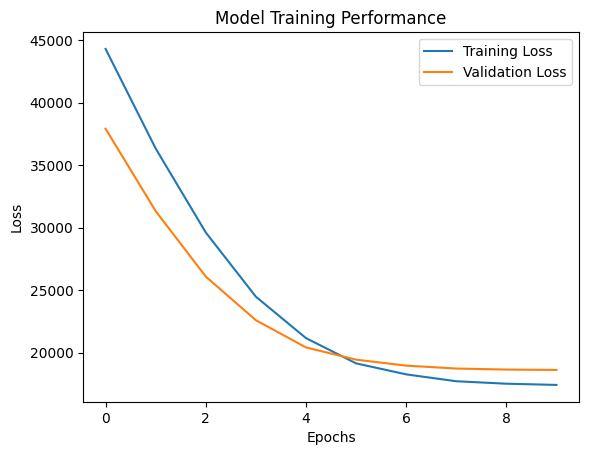

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [22]:
predictions = model.predict(x_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[273.91122],
       [238.63515],
       [254.67513],
       [187.71068],
       [356.04965],
       [299.53027],
       [342.21344],
       [283.5881 ],
       [280.21048],
       [268.6226 ],
       [232.51183],
       [248.23924],
       [271.42624],
       [213.84789],
       [294.8348 ],
       [306.60867],
       [250.30263],
       [304.29965],
       [288.69888],
       [223.94228],
       [262.5097 ],
       [306.2903 ],
       [258.41324],
       [259.72476],
       [247.33568],
       [238.29716],
       [257.6805 ],
       [335.67343],
       [309.23898],
       [256.6807 ],
       [226.81732],
       [312.59802],
       [292.3804 ],
       [261.4451 ],
       [309.4724 ],
       [288.70944],
       [201.13646],
       [254.00359],
       [276.89047],
       [232.17729],
       [250.21797],
       [235.05234],
       [235.94273],
       [254.32053],
       [255.11766],
       [251.59016],
       [265.82895],
       [259.4354 ],
       [287.5827 ],
       [309.09518],


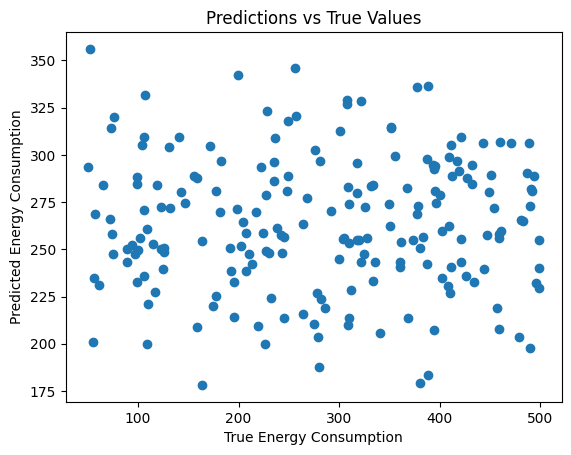

In [23]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()